# Generating a map with roads maintained by the federal government in Brazil

## This code gets data from the Brazilian Ministry of Infrastructure, showing roads along the territory

### Download data from the Ministry's website

Import the necessary libraries to access the website and download its contents

In [1]:
from bs4 import BeautifulSoup
import requests
from zipfile import ZipFile

Connect to the Ministry's website for information on roads, download the .zip file

In [2]:
zip_file_url = 'https://www.gov.br/infraestrutura/pt-br/assuntos/dados-de-transportes/bit/arquivos-bit/rodovias.zip'
r = requests.get(zip_file_url, stream=True) 

# Get the file name
zip_file_name = zip_file_url.split('/')[-1]

# Write file then close
with open(zip_file_name, 'wb') as fd:        
    for chunk in r.iter_content(chunk_size=1024):
        fd.write(chunk)
    fd.close()

Extract files

In [3]:
# Extract files
with ZipFile(zip_file_name, 'r') as zip:
      
    print('Extracting files...')
    zip.extractall()
    zip.printdir
    print('Done!')

# Get file names
dirlist = zip.namelist()
print(dirlist)

Extracting files...
Done!
['Rodovias/', 'Rodovias/Rodovias.cpg', 'Rodovias/Rodovias.dbf', 'Rodovias/Rodovias.prj', 'Rodovias/Rodovias.sbn', 'Rodovias/Rodovias.sbx', 'Rodovias/Rodovias.shp', 'Rodovias/Rodovias.shp.xml', 'Rodovias/Rodovias.shx']


### Read and plot the shapefile containing road data

Import the necessary libraries (`geopandas` and `matplotlib`). We are going to use the file `'Rodovias/Rodovias.shp'` listed above

In [4]:
%%capture --no-display 

import geopandas as gpd
import matplotlib.pyplot as plt

shpdata = gpd.read_file(dirlist[6])
shpdata.head()

,objectid,id_trecho_,vl_br,sg_uf,nm_tipo_tr,sg_tipo_tr,desc_coinc,vl_codigo,ds_local_i,ds_local_f,...,ds_jurisdi,ds_superfi,ds_legenda,sg_legenda,leg_multim,versao_snv,id_versao,marcador,st_length_,geometry
0,1,151119,010,DF,Eixo Principal,B,-,010BDF0010,ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA),ENTR DF-440,...,None,PAV,Duplicada,DUP,Duplicada Concessão/Convênio,202108A,59,|,0.022448,"LINESTRING (-47.85885 -15.68816, -47.85879 -15..."
1,2,151120,010,DF,Eixo Principal,B,-,010BDF0015,ENTR DF-440,ACESSO I SOBRADINHO,...,None,PAV,Duplicada,DUP,Duplicada Concessão/Convênio,202108A,59,|,0.034009,"LINESTRING (-47.83735 -15.68180, -47.83719 -15..."
2,3,151121,010,DF,Eixo Principal,B,-,010BDF0016,ACESSO I SOBRADINHO,ACESSO II SOBRADINHO,...,None,PAV,Duplicada,DUP,Duplicada Concessão/Convênio,202108A,59,|,0.021909,"LINESTRING (-47.80760 -15.66586, -47.80747 -15..."
3,4,151122,010,DF,Eixo Principal,B,-,010BDF0018,ACESSO II SOBRADINHO,ENTR DF-230,...,None,PAV,Duplicada,DUP,Duplicada Concessão/Convênio,202108A,59,|,0.091742,"LINESTRING (-47.78774 -15.65664, -47.78760 -15..."
4,5,151123,010,DF,Eixo Principal,B,-,010BDF0020,ENTR DF-230,ENTR DF-128,...,None,PAV,Duplicada,DUP,Duplicada Concessão/Convênio,202108A,59,|,0.035416,"LINESTRING (-47.70599 -15.61521, -47.70587 -15..."


Now plot the roads using the generated geodataframe, as well as the country borders json file generated by the notebook available [here](https://github.com/L-Lemos/phd_thesis/blob/main/BR_Maps/Solar_Atlas_2017_GHI/Brazil_Solar_Irradiation_Map.ipynb)

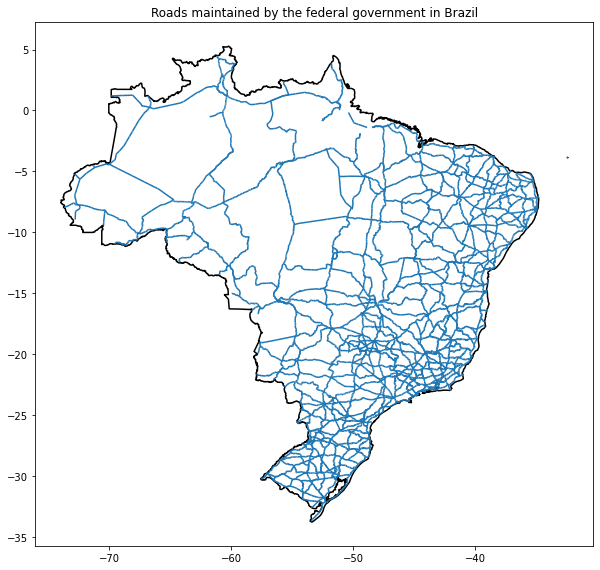

In [5]:
%%capture --no-display 

br_borders = gpd.GeoDataFrame.from_file('br_border.json')

fig, ax = plt.subplots(1,1,figsize=(10,10))
br_borders.boundary.plot(ax=ax, color='black')
plt.title('Roads maintained by the federal government in Brazil')
shpdata.plot(ax=ax)

plt.savefig('BR_Roads_map.png')